# 1. Setup

In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False 

In [2]:
import os
import pathlib
import logging

from src.utils import get_byte_size
from src.constants import GWS_DATA_DIR, WGS84, PREFERRED_CRS

# For loading and manipulating vector data
import geopandas as gpd
from shapely.geometry import box, Point

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# 2. Analysis of Habitat data from chernobyl

Background on the data (from email thread with Tom Dowling):

1.	How and by whom was this data collected?
- Collected by Dmitri Grummo (botanist in Belarus) and his team. It is a mixture of physical habitat surveys, data from the forestry department and remote-sensed data. He will need to be credited in any publications that come out of this work. I suggest offering co-authorship. The map was made to inform protected area designation and aid biodiversity monitoring for the Endangered Landscapes Programme project. https://www.endangeredlandscapes.org/project/polesia/ - I'm coordinating a large part of the scientific research of this project.

2.	When was this data collected? 
- physical surveys done in 2019, I'm not 100% sure which years the cloud free composites for the remote-sensing data are between, but I will try and find out.

3.	What’s the difference between the vegetation and the biotope data? 
- (named Vegetation_mape.shp and Biotope_EUNIS_ver1.shp respectively, they seem to have similar shapes but not the entirely the same). The Eunis data is classified according to Eunis classifications, whereas the other map has a slightly more detailed classification, including some more mire types. For your needs I would suggest the Eunis map.

4.	What do the class labels of the vegetation data set mean? 
- Do you mean the vegetation types?

5.	How was the location of the data chosen? 
- (it's not quite within the exclusion zone as far as we were able to tell.) This is the core region of the Endangered landscapes programme project "Polesia: wilderness without borders" and includes some of the "wildest" areas in Belarus.
- Indeed it is not quite in the exclusion zone. As Adham pointed out in a prior email, it does however cover one of the last areas of truly remote wilderness. Whereas the CEZ is actually a 'recovering' wilderness. My suggestion is to build a habitat mapping and fragmentation tool using the existing data. And then apply that to the CEZ and another neighboring non-restricted area to demonstrate the effectiveness of the approach on a region that was not involved in the training process- as well as providing a nice story 'hook' to write up around this would be a scientifically robust way to prove applicability outside of your training set. 


<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Turkey. Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



,Vegetation,AREA,geometry
10467,51,18.92900,"POLYGON Z ((549784.331 5746586.268 0.000, 5498..."
11771,60,10.06880,"POLYGON Z ((549658.571 5733596.813 0.000, 5496..."
12160,60,14.05760,"POLYGON Z ((600573.318 5775289.878 0.000, 6006..."
11879,60,5.28587,"POLYGON Z ((562513.968 5741013.490 0.000, 5625..."
9713,48,19.48700,"POLYGON Z ((595674.197 5714118.125 0.000, 5957..."
12020,60,19.65730,"POLYGON Z ((587085.312 5749082.639 0.000, 5870..."
9929,50,11.50260,"POLYGON Z ((609095.734 5718286.166 0.000, 6091..."
538,2,6.96349,"POLYGON Z ((572596.610 5719902.717 0.000, 5725..."
6233,26,5.89072,"POLYGON Z ((585708.344 5756265.487 0.000, 5856..."
2697,3,9.73789,"POLYGON Z ((532792.273 5757860.739 0.000, 5328..."


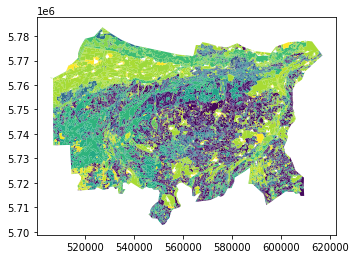

In [3]:
veg_data = gpd.read_file(GWS_DATA_DIR / "chernobyl_habitat_data" / "Vegetation_mape.shp")
print(veg_data.crs.__repr__())
veg_data.plot("Vegetation")
veg_data.sample(10)

In [4]:
print(get_byte_size(veg_data))

6 MB


<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Turkey. Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich



,OBJECTID,N_Eunis,Eunis_name,Shape_Leng,Shape_Area,Leg,AREA,geometry
380,424,D2.3,Transition mires and quaking bogs,21580.258762,4.533564e+06,3,453.35600,"POLYGON Z ((522164.890 5756687.815 0.000, 5221..."
12453,12497,G5.82,"Recently felled areas, formerly coniferous trees",1255.815263,5.608375e+04,40,5.60837,"POLYGON Z ((595966.465 5726599.105 0.000, 5961..."
6956,7000,G3.42114,Subcontinental moorgrass Scots pine forests,3052.304676,1.381651e+05,23,13.81650,"POLYGON Z ((551438.673 5714760.773 0.000, 5514..."
206,250,D2.3,Transition mires and quaking bogs,4931.002723,8.979501e+05,3,89.79500,"POLYGON Z ((527641.119 5729651.190 0.000, 5276..."
3642,3686,G1.513,Meso-acidophilous birch swamp woods,1238.461696,6.594805e+04,16,6.59481,"POLYGON Z ((580434.234 5761898.918 0.000, 5804..."
3341,3385,G1.513,Meso-acidophilous birch swamp woods,5355.931019,1.055412e+06,16,105.54100,"POLYGON Z ((535879.943 5737132.682 0.000, 5361..."
65,109,D1.11,"Active, relatively undamaged raised bogs",5357.535933,4.534796e+05,2,45.34800,"POLYGON Z ((510240.999 5746924.598 0.000, 5102..."
4892,4936,G3.42111,Subcontinental moss Scots pine forests,1932.451405,7.915495e+04,20,7.91549,"POLYGON Z ((523501.736 5751461.611 0.000, 5234..."
2900,2944,G1.4113,East European swamp alder woods,1606.898170,5.308829e+04,15,5.30883,"POLYGON Z ((533454.122 5752853.133 0.000, 5334..."
10763,10807,G5.61,Deciduous scrub woodland,1210.954826,6.237108e+04,36,6.23711,"POLYGON Z ((578820.610 5719132.112 0.000, 5788..."


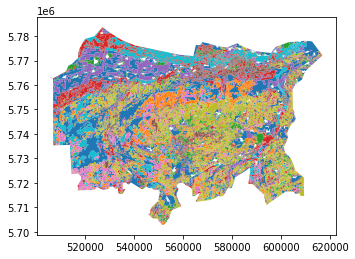

In [5]:
biotope_data = gpd.read_file(GWS_DATA_DIR / "chernobyl_habitat_data" / "Biotope_EUNIS_ver1_1.shp")
print(biotope_data.crs.__repr__())
biotope_data.plot("Eunis_name")
biotope_data.sample(10)

In [6]:
get_byte_size(biotope_data)

'14 MB'